In [2]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [3]:
# Constants
agent_name = "swq14"
model_name = "debug_2"

In [4]:
trained_model = np.load(f"model_{agent_name}_{model_name}.pt", allow_pickle = True)
policy        = np.argmax(trained_model, axis = 1)

In [5]:
all_features = np.array(
    [
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 1],
        [0, 1, 1, 1],
        [1, 1, 1, 1],
        [0, 0, 0, 2],
        [0, 0, 1, 2],
        [0, 1, 1, 2],
        [1, 1, 1, 2],
        [0, 0, 2, 2],
        [0, 1, 2, 2],
        [1, 1, 2, 2],
        [0, 2, 2, 2],
        [1, 2, 2, 2],
        [2, 2, 2, 2],   
    ]
)

### Evaluating the trained model

In [6]:
print("State  Features   Policy  Trained model")
for i in range(len(policy)):
    line = f"{i:2}{'':5}{all_features[i]}{'':2}{policy[i]}{'':7}["
    for Q_value in trained_model[i]:
        line += f"{Q_value:-7.3f}"
    line += "]"
    print(line)

State  Features   Policy  Trained model
 0     [0 0 0 0]  0       [  0.000  0.000  0.000  0.000]
 1     [0 0 0 1]  0       [  0.000  0.000  0.000  0.000]
 2     [0 0 1 1]  0       [  1.042  0.000  0.000  0.003]
 3     [0 1 1 1]  0       [  0.000  0.000  0.000  0.000]
 4     [1 1 1 1]  0       [  0.000  0.000  0.000  0.000]
 5     [0 0 0 2]  0       [  0.000  0.000  0.000  0.000]
 6     [0 0 1 2]  3       [ -0.127 -0.160  0.000  1.518]
 7     [0 1 1 2]  3       [ -0.052  0.000  0.000  2.402]
 8     [1 1 1 2]  3       [  0.000  0.000  0.000  2.683]
 9     [0 0 2 2]  2       [ -0.024 -0.036  0.564  0.000]
10     [0 1 2 2]  2       [ -0.014  0.000  1.721  0.018]
11     [1 1 2 2]  2       [  0.000  0.000  2.278  0.003]
12     [0 2 2 2]  2       [ -0.000  0.000  0.000  0.000]
13     [1 2 2 2]  2       [  0.000  0.003  1.536  0.000]
14     [2 2 2 2]  0       [  0.000  0.000  0.000  0.000]


### Looking at the training process

In [7]:
def moving_average(x, w):
    """
    from https://newbedev.com/how-to-calculate-rolling-moving-average-using-numpy-scipy
    """
    return np.convolve(x, np.ones(w), 'valid') / w

In [8]:
def analyze_state (state):
    Q_state = allQs[:, state]
    labels  = ["action 0", "action 1", "action 2", "action 3"]

    plt.plot(rounds, Q_state, label = labels)
    plt.title(f"Evolution of state {state}")
    plt.ylabel("Q-value")
    plt.xlabel("training round")
    plt.legend()
    plt.show()

### Training performance over rounds

In [9]:
with open("results_train.json") as file:
    training_results = json.load(file)

In [31]:
number_of_rounds = training_results['by_agent'][f"agent_{agent_name}"]['rounds']
rounds           = np.arange(number_of_rounds) + 1

round_list      = list(training_results['by_round'])
# debug_rounds    = []
# debug_round_names    = []
collected_coins = np.zeros(number_of_rounds)
round_lengths   = np.zeros(number_of_rounds)
for i, round_name in enumerate(round_list):
    print(round_name)
    round              = training_results['by_round'][round_name]
    collected_coins[i] = round['coins']
    round_lengths[i]   = round['steps']

    '''
    if collected_coins[i] / round_lengths[i] < 0.1: # collect some weird rounds to see in log
        debug_rounds.append(i)
        debug_round_names.append(round_name)
    '''

'''
example = debug_rounds[100]
print(collected_coins[debug_rounds[100]], debug_round_names[100])
'''

Round 01 (2022-03-16 23-06-56)
Round 02 (2022-03-16 23-06-57)
Round 03 (2022-03-16 23-06-58)
Round 04 (2022-03-16 23-07-00)
Round 05 (2022-03-16 23-07-01)
Round 06 (2022-03-16 23-07-02)
Round 07 (2022-03-16 23-07-03)
Round 08 (2022-03-16 23-07-04)
Round 09 (2022-03-16 23-07-05)
Round 10 (2022-03-16 23-07-06)
Round 100 (2022-03-16 23-08-33)
Round 1000 (2022-03-16 23-22-38)
Round 10000 (2022-03-17 00-18-26)
Round 1001 (2022-03-16 23-22-39)
Round 1002 (2022-03-16 23-22-40)
Round 1003 (2022-03-16 23-22-41)
Round 1004 (2022-03-16 23-22-42)
Round 1005 (2022-03-16 23-22-43)
Round 1006 (2022-03-16 23-22-43)
Round 1007 (2022-03-16 23-22-44)
Round 1008 (2022-03-16 23-22-45)
Round 1009 (2022-03-16 23-22-45)
Round 101 (2022-03-16 23-08-34)
Round 1010 (2022-03-16 23-22-46)
Round 1011 (2022-03-16 23-22-47)
Round 1012 (2022-03-16 23-22-48)
Round 1013 (2022-03-16 23-22-49)
Round 1014 (2022-03-16 23-22-49)
Round 1015 (2022-03-16 23-22-50)
Round 1016 (2022-03-16 23-22-51)
Round 1017 (2022-03-16 23-22-52

'\nexample = debug_rounds[100]\nprint(collected_coins[debug_rounds[100]], debug_round_names[100])\n'

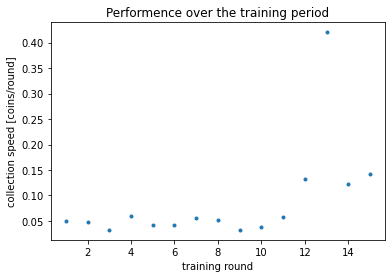

In [30]:
plt.plot(rounds[:15], collected_coins[:15] / round_lengths[:15], '.')
plt.title("Performence over the training period")
plt.ylabel("collection speed [coins/round]")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")
plt.show()

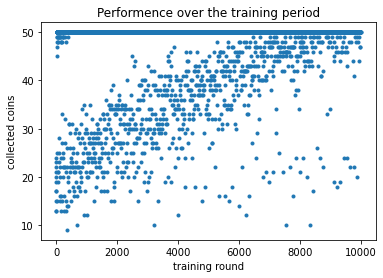

In [15]:
plt.plot(rounds, collected_coins, '.')
plt.title("Performence over the training period")
plt.ylabel("collected coins")   # 50 is maximum
plt.xlabel("training round")
plt.show()

### Evolution of the Q-model

In [ ]:
allQs = np.load("Qtrain.npy")

for i in range(len(policy)):
    analyze_state(i)

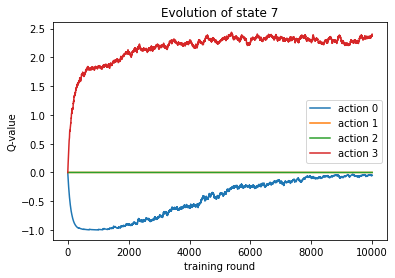

In [ ]:
analyze_state(7)

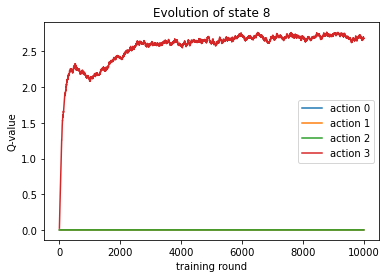

In [ ]:
analyze_state(8)

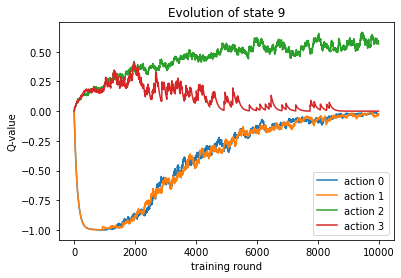

In [ ]:
analyze_state(9)

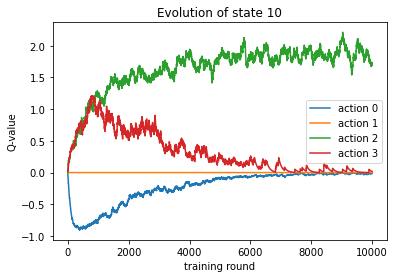

In [ ]:
analyze_state(10)

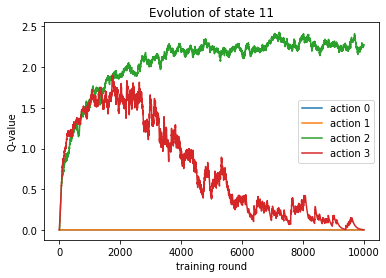

In [ ]:
analyze_state(11)